In [66]:
import numpy as np, os, sys, joblib,time
from scipy.io import loadmat
from get_12ECG_features import get_12ECG_features
import pandas as pd
from tqdm import tqdm
import random
from config import config
import utils
import warnings
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [67]:
def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)

    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)

    with open(input_header_file,'r') as f:
        header_data=f.readlines()

    return data, header_data

def plot_data(axis, data, title='', fontsize=10):
    axis.set_title(title, fontsize=fontsize)
    axis.grid(which='both', axis='both', linestyle='--')
    axis.plot(data, color="salmon", zorder=1)

In [68]:
input_files=[]
header_files=[]
input_directory='/data1/jiawenxiao/physionet2020_official/Training'
train_directory=input_directory
for f in os.listdir(train_directory):
    if os.path.isfile(os.path.join(train_directory, f)) and not f.lower().startswith('.') and f.lower().endswith('mat'):
        g = f.replace('.mat','.hea')
        input_files.append(f)
        header_files.append(g)

['right bundle branch block']


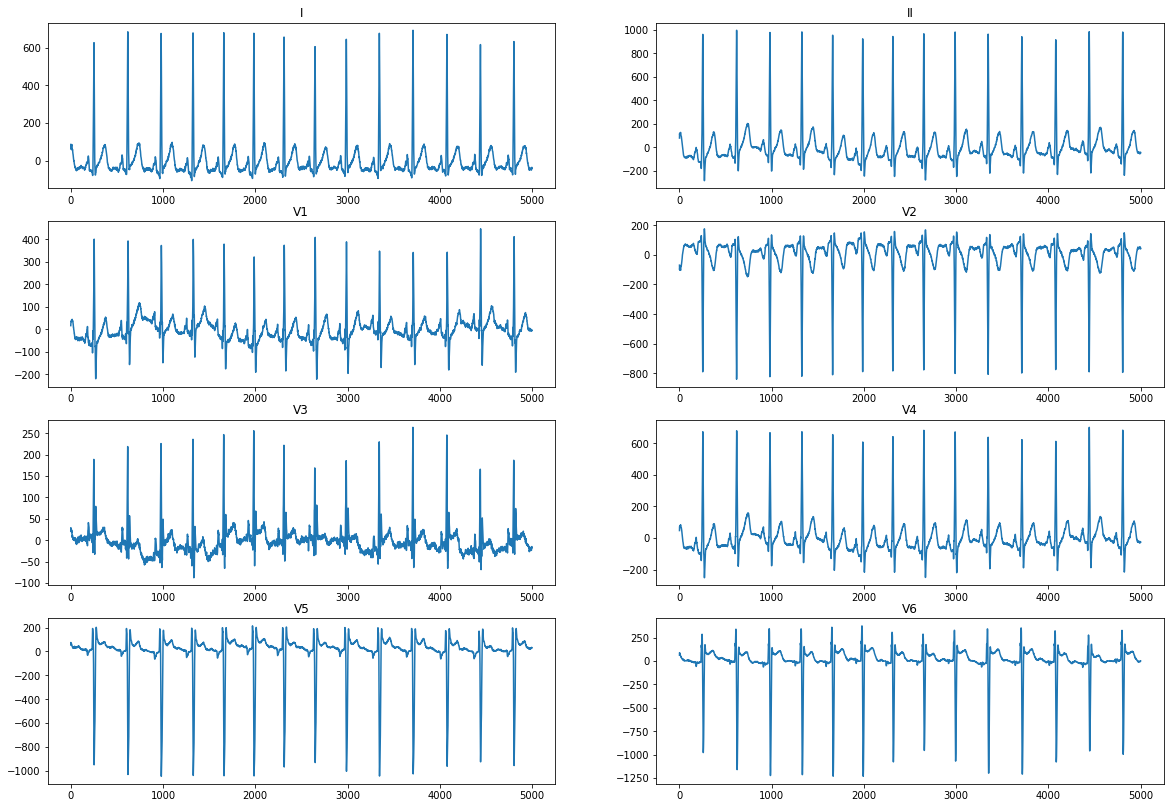

In [93]:
f=input_files[10]
classes=[]
tmp_input_file = os.path.join(train_directory,f)

# tmp_input_file='/data1/jiawenxiao/physionet2020_official/Training/S0009.mat'
data,header_data = load_challenge_data(tmp_input_file)  


        
tmp_hea = header_data[0].split(' ')
sample_Fs= int(tmp_hea[2])

if sample_Fs==1000:   
    rs_idx=range(0,len(data[0]),2)
    data=data[:,rs_idx]  
    

for i,lines in enumerate(header_data):
    if lines.startswith('#Dx'):
        tmp = lines.split(': ')[1].split(',')
        for c in tmp:
            classes.append(c.strip())  
score_data=pd.read_csv('/data1/jiawenxiao/physionet2020_official/submit_code_0820/dx_mapping_scored.csv')  
score_data=score_data.loc[score_data['SNOMED CT Code'].isin(classes),'Dx']
print(score_data.tolist())
dic={1:'I',2:'II',3:'V1',4:'V2',5:'V3',6:'V4',7:'V5',8:'V6'}
plt.figure(figsize=(20,14))
for i in range(1,9):
    plt.subplot(4,2,i)
    if data.shape[1]>=5000:
        plt.plot(data[i-1,:5000])
    else:
        plt.plot(data[i-1,:])        
    plt.title(dic[i])
plt.show()